# Homework 1: NLP Basics and NLP Pipelines (7 + 1 points)

**Welcome to homework 1!** 

The homework contains several tasks. You can find the amount of points you get for the correct solution in the task header. Maximum amount of points for each homework is 7 + 1 (bonus exercise). 
The **grading** for each task is the following: 
* correct answer - **full points** 
* insufficient solution or solution resulting in the incorrect output - **half points**
* no answer or completely wrong solution - **no points**

Even if you don't know how to solve the task, we encourage you to write down your thoughts and progress and try to address the issues that stop you from completing the task.

When working on the written tasks, try to make your answers short and accurate. Most of the times, it is possible to answer the question in 1-3 sentences.

When writing code, make it readable. Choose appropriate names for your variables (a = 'cat' - not good, word = 'cat' - good). Avoid constructing lines of code longer than 100 characters (79 characters is ideal). If needed, provide the commentaries for your code, however, a good code should be easily readable without them :)

Finally, all your answers should be written only by yourself. If you copy them from other sources it will be considered as an academic fraud. You can discuss the tasks with your classmates but each solution must be individual.



**Before sending your solution, do the Kernel -> Restart & Run All to ensure that all your code works.**

In [1]:
#!pip install stanza 

In [2]:
from bs4 import BeautifulSoup

import nltk
from nltk import word_tokenize, sent_tokenize, pos_tag
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords, wordnet

import spacy
nlp = spacy.load("en_core_web_sm")
from spacy.lang.en.stop_words import STOP_WORDS
import stanza

from tqdm.notebook import tqdm
import re
from collections import defaultdict, Counter

import matplotlib.pyplot as plt
import string

import pandas as pd

In [3]:
stanza.download(lang='en', verbose=False) # download appropriate language model for your chosen language

## Task 1: Find the data (0.5 points)

Find large enough text data in English or any other language supported by spaCy and Stanza. If the resources for your language are very limited, you may use English or other language of your preference. 

**What is the language of your data?**

<font color='red'>English</font>

**Where did you get the text data?**

<font color='red'>Wikipedia. Here's the link: https://en.wikipedia.org/wiki/The_Metropolis_and_Mental_Life</font>

**What kind of text is it? (books, magazines, news articles, etc.)**

<font color='red'>It is an info page for Georg Simmel's sociological analysis of modern city, 'The Metropolis and Mental Life' .</font>

**What style(s) of text does your data have? (user commetaries, scientific, neutral, etc.)**

<font color='red'>It has a high number of html tags besides the actual text data. It is organized in a couple of different sections(sub-headings named as 'overview', 'references', 'see also' etc), includes a table of contents, footer and a header. In short it is a classical wikipedia webpage, it is hard to describe everything in it with words.</font>

**Was it easy to download the data? If no, desribe what difficulties you had and how you resolved them.**

<font color='red'>Yes, it was easy to download it with a few clicks.</font>



## Task 2: Tokenize and count statistics (1 points)

Using either NLTK or Spacy tools, tokenize your text data you found in the previous exercise. 

P.S. If you are using Spacy, don't forget to load an appropriate module for it. 

**Compute and output the following:**
* number of sentences
* number of tokens
* number of unique tokens (or types)
* average length of a sentence 
* average length of a token
* sentence length (tokens in a sentence) histogram (you can use matplotlib.pyplot for that) 
* token length (characters in a token) histogram (you can use matplotlib.pyplot for that) 

In [4]:
# Replace the path with the name of your data file
data_path = "metropolis.html"

data = open(data_path, errors='ignore').read()
soup = BeautifulSoup(data, 'html.parser')

# Split the data into sentences and tokens

In [5]:
# Let's get the raw data first.

tag = soup.find_all(['p']) 
wikitext = ''

for sents in tag:
    wikitext += sents.text
    
print(wikitext)


The Metropolis and Mental Life (German: Die GroÃŸstÃ¤dte und das Geistesleben) is a 1903 essay by the German sociologist, Georg Simmel.
One of Simmel's most widely read works, The Metropolis was originally provided as one of a series of lectures on all aspects of city life by experts in various fields, ranging from science and religion to art. The series was conducted alongside the Dresden cities exhibition of 1903. Simmel was originally asked to lecture on the role of intellectual (or scholarly) life in the big city, but he reversed the topic in order to analyze the effects of the big city on the mind of the individual.[citation needed] As a result, when the lectures were published as essays in a book, to fill the gap, the series editor had to supply an essay on the original topic himself.[citation needed]
Simmel compared the psychology of the individual in rural life with the psychology of the city dweller. His investigation determines that the human psychology is altered by the met

In [6]:
# Print if you wanna get a better grasp of the location of \n characters.
# wikitext

Some patterns in the data(eg: '[citation needed]' ) are not needed, and paragraphs can be separeted better than in the raw text. For this end I will use some regex patterns.

In [7]:
simmeltext = re.sub(r"\[citation needed]|\[\d]", "", wikitext)
simmeltext = re.sub(r"\.S", '.\nS', simmeltext)

print(simmeltext) 


The Metropolis and Mental Life (German: Die GroÃŸstÃ¤dte und das Geistesleben) is a 1903 essay by the German sociologist, Georg Simmel.
One of Simmel's most widely read works, The Metropolis was originally provided as one of a series of lectures on all aspects of city life by experts in various fields, ranging from science and religion to art. The series was conducted alongside the Dresden cities exhibition of 1903. Simmel was originally asked to lecture on the role of intellectual (or scholarly) life in the big city, but he reversed the topic in order to analyze the effects of the big city on the mind of the individual. As a result, when the lectures were published as essays in a book, to fill the gap, the series editor had to supply an essay on the original topic himself.
Simmel compared the psychology of the individual in rural life with the psychology of the city dweller. His investigation determines that the human psychology is altered by the metropolis. The individual must conte

In [8]:
simmeltext = re.sub(r"\n", '\n\n', simmeltext)
simmeltext = re.sub(r'\n\n', '', simmeltext, 1)
print(simmeltext)

The Metropolis and Mental Life (German: Die GroÃŸstÃ¤dte und das Geistesleben) is a 1903 essay by the German sociologist, Georg Simmel.

One of Simmel's most widely read works, The Metropolis was originally provided as one of a series of lectures on all aspects of city life by experts in various fields, ranging from science and religion to art. The series was conducted alongside the Dresden cities exhibition of 1903. Simmel was originally asked to lecture on the role of intellectual (or scholarly) life in the big city, but he reversed the topic in order to analyze the effects of the big city on the mind of the individual. As a result, when the lectures were published as essays in a book, to fill the gap, the series editor had to supply an essay on the original topic himself.

Simmel compared the psychology of the individual in rural life with the psychology of the city dweller. His investigation determines that the human psychology is altered by the metropolis. The individual must cont

Some cleaning can still be made to include the german characters, but I will stop the process here for practical reasons. The text above seems good enough.

In [9]:
# Split the data into sentences and tokens
simmeldoc = nlp(simmeltext)

# These lists below are subject to change. But let's create them first and check their elements later.
simmel_sents_list = [sent.text for sent in simmeldoc.sents]
simmel_tokens_list = [token.text for token in simmeldoc] 

In [10]:
simmel_sents_list

['The Metropolis and Mental Life',
 '(German',
 ': Die GroÃŸstÃ¤dte',
 'und das Geistesleben) is a 1903 essay by the German sociologist, Georg Simmel.\n\n',
 "One of Simmel's most widely read works, The Metropolis was originally provided as one of a series of lectures on all aspects of city life by experts in various fields, ranging from science and religion to art.",
 'The series was conducted alongside the Dresden cities exhibition of 1903.',
 'Simmel was originally asked to lecture on the role of intellectual (or scholarly) life in the big city, but he reversed the topic in order to analyze the effects of the big city on the mind of the individual.',
 'As a result, when the lectures were published as essays in a book, to fill the gap, the series editor had to supply an essay on the original topic himself.\n\n',
 'Simmel compared the psychology of the individual in rural life with the psychology of the city dweller.',
 'His investigation determines that the human psychology is altere

As we can see, spacy splitted the first sentence(the summary section of the wiki article) wrongly by creating 4 sentences out of it. We need to merge them together.

In [11]:
# Much better now.
simmel_sents_list[0 : 4] = [''.join(simmel_sents_list[0 : 4])] 
simmel_sents_list

['The Metropolis and Mental Life(German: Die GroÃŸstÃ¤dteund das Geistesleben) is a 1903 essay by the German sociologist, Georg Simmel.\n\n',
 "One of Simmel's most widely read works, The Metropolis was originally provided as one of a series of lectures on all aspects of city life by experts in various fields, ranging from science and religion to art.",
 'The series was conducted alongside the Dresden cities exhibition of 1903.',
 'Simmel was originally asked to lecture on the role of intellectual (or scholarly) life in the big city, but he reversed the topic in order to analyze the effects of the big city on the mind of the individual.',
 'As a result, when the lectures were published as essays in a book, to fill the gap, the series editor had to supply an essay on the original topic himself.\n\n',
 'Simmel compared the psychology of the individual in rural life with the psychology of the city dweller.',
 'His investigation determines that the human psychology is altered by the metrop

In [12]:
simmel_tokens_list

['The',
 'Metropolis',
 'and',
 'Mental',
 'Life',
 '(',
 'German',
 ':',
 'Die',
 'GroÃŸstÃ¤dte',
 'und',
 'das',
 'Geistesleben',
 ')',
 'is',
 'a',
 '1903',
 'essay',
 'by',
 'the',
 'German',
 'sociologist',
 ',',
 'Georg',
 'Simmel',
 '.',
 '\n\n',
 'One',
 'of',
 'Simmel',
 "'s",
 'most',
 'widely',
 'read',
 'works',
 ',',
 'The',
 'Metropolis',
 'was',
 'originally',
 'provided',
 'as',
 'one',
 'of',
 'a',
 'series',
 'of',
 'lectures',
 'on',
 'all',
 'aspects',
 'of',
 'city',
 'life',
 'by',
 'experts',
 'in',
 'various',
 'fields',
 ',',
 'ranging',
 'from',
 'science',
 'and',
 'religion',
 'to',
 'art',
 '.',
 'The',
 'series',
 'was',
 'conducted',
 'alongside',
 'the',
 'Dresden',
 'cities',
 'exhibition',
 'of',
 '1903',
 '.',
 'Simmel',
 'was',
 'originally',
 'asked',
 'to',
 'lecture',
 'on',
 'the',
 'role',
 'of',
 'intellectual',
 '(',
 'or',
 'scholarly',
 ')',
 'life',
 'in',
 'the',
 'big',
 'city',
 ',',
 'but',
 'he',
 'reversed',
 'the',
 'topic',
 'in',
 

The list of tokens are also in a mess, but we will clean it later in Task 4. So let's keep this list for now.

In [13]:
num_sentences = len(simmel_sents_list)
num_tokens = len(simmel_tokens_list)
num_unique_tokens = len(set(simmel_tokens_list))
avg_sentence_len = round(sum(len(elem) for elem in simmel_sents_list) / num_sentences, 3)
avg_token_len = round(sum(len(elem) for elem in simmel_tokens_list) / num_tokens, 3)

print("Number of sentences:", num_sentences)
print("Number of tokens:", num_tokens)
print("Number of unique tokens (or types):", num_unique_tokens)
print("Average sentence length:", avg_sentence_len)
print("Average token length:", avg_token_len)

Number of sentences: 19
Number of tokens: 652
Number of unique tokens (or types): 289
Average sentence length: 189.579
Average token length: 4.669


In [14]:
plt.style.use('ggplot') 

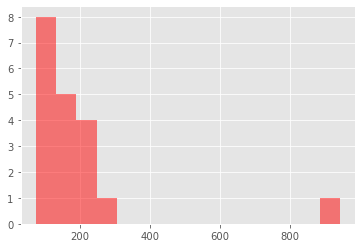

In [15]:
sentence_lengths = [len(elem) for elem in simmel_sents_list]

# draw the histogram 
n, bins, patches = plt.hist(sentence_lengths, bins = 15, facecolor='red', alpha=0.5)
plt.show()

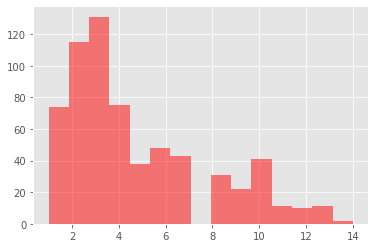

In [16]:
token_lengths = [len(elem) for elem in simmel_tokens_list]

# draw the histogram
n, bins, patches = plt.hist(token_lengths, bins = 15, facecolor='red', alpha=0.5)
plt.show()

## Task 3: Bype pair encoding (BPE) tokenization (1 point) 

### Task 3.1 (0.25 points)

Byte pair encoding (BPE) [link text](https://en.wikipedia.org/wiki/Byte_pair_encoding) is a simple algorithm of data compression. It looks for the most frequent pair of bytes in the data and replaces it with a new byte which is not seen in the data.

Recently, this idea became used in the [tokenization](https://www.aclweb.org/anthology/P16-1162.pdf). Let's say that we want to train a network that captures the meaning of words. We can have in out data the following words: low, lower, lowest. If we tokenize the text in a simple way by splitting the words as a whole, the model will probably learn the relation between low, lower, lowest. Now, imagine that we get some new text that the model didn't see during training and it has the words small, smaller, smallest and in the training data we had only the word small. Since the model didn't see smaller and smallest during the training, it will most likely fail to capture the relation.

One of the ways to solve this is BPE tokenization. It learns the most frequent sequences and can split an unknown word into **subwords**. In our case, it can split smaller into ['small', 'er'] since we had small in the training data and probably many other words ending with -er. Now. instead of one unknown word, the model have two known subwords from which it can take the information.

The code below builds the subwords from the text data. For the purpose of time saving, we set the number of merges to 1000.

**Study the code below and answer the questions after it.**


In [17]:
def get_vocab(filename):
    """Gets the text from a file and splits it with spaces."""
    
    vocab = Counter()
    with open(filename, encoding='utf-8') as f:
        for line in f:
            words = line.strip().split()
            for word in words:
                vocab[' '.join(list(word)) + ' </w>'] += 1
    return vocab

def get_stats(vocab):
    """Computes the frequencies for each pair of characters in the vocab."""

    pairs = Counter()
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq
    return pairs

def merge_vocab(pair, in_vocab):
    """Merges the most frequent pair.

    Arguments:
    pair -- the most frequent word pair (tuple(str, str))
    in_vocab -- vocabulary with frequencies (dict)
    """
    
    out_vocab = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in in_vocab:
        out_word = p.sub(''.join(pair), word)
        out_vocab[out_word] = in_vocab[word]
    return out_vocab

def get_tokens_from_vocab(vocab):
    tokens_frequencies = Counter()
    vocab_tokenization = {}
    for word, freq in vocab.items():
        word_tokens = word.split()
        for token in word_tokens:
            tokens_frequencies[token] += freq
        vocab_tokenization[''.join(word_tokens)] = word_tokens
    return tokens_frequencies, vocab_tokenization

def measure_token_length(token):
    if token[-4:] == '</w>':
        return len(token[:-4]) + 1
    else:
        return len(token)

vocab = get_vocab(data_path)

print('==========')
print('Tokens Before BPE')
tokens_frequencies, vocab_tokenization = get_tokens_from_vocab(vocab)
print('All tokens: {}'.format(tokens_frequencies.keys()))
print('Number of tokens: {}'.format(len(tokens_frequencies.keys())))
print('==========')

num_merges = 1000
for i in tqdm(range(num_merges)):
    pairs = get_stats(vocab)
    if not pairs:
        break
    best = max(pairs, key=pairs.get)
    vocab = merge_vocab(best, vocab)

tokens_frequencies, vocab_tokenization = get_tokens_from_vocab(vocab)

print('All tokens: {}'.format(tokens_frequencies.keys()))
print('Number of tokens: {}'.format(len(tokens_frequencies.keys())))
print('==========')

Tokens Before BPE
All tokens: dict_keys(['<', '!', 'D', 'O', 'C', 'T', 'Y', 'P', 'E', '</w>', 'h', 't', 'm', 'l', '>', 'c', 'a', 's', '=', '"', 'i', 'e', 'n', '-', 'o', 'j', 'g', 'd', 'r', 'U', 'F', '8', '/', 'M', 'p', 'L', 'f', 'W', 'k', 'u', '.', 'N', ';', 'R', '{', 'w', 'B', ':', '1', ',', 'S', 'b', '[', ']', 'y', 'J', 'A', 'v', 'q', 'I', '@', 'Z', 'Q', '0', '_', '9', '7', '2', '5', '6', 'G', '*', '3', 'x', 'V', '}', '(', '|', ')', 'z', '$', '+', '\\', '?', '&', '%', '4', 'H', '#', 'K', 'É', 'ü', 'ö', 'ß', 'ä', "'", '’', '–', '—', '^', '‐', 'Б', 'о', 'л', 'ь', 'ш', 'и', 'е', 'г', 'р', 'д', 'а', 'у', 'х', 'в', 'н', 'я', 'ж', 'з', 'Р', 'с', 'к', 'й', '®'])
Number of tokens: 124



All tokens: dict_keys(['<!', 'D', 'O', 'C', 'T', 'Y', 'P', 'E', '</w>', 'ht', 'm', 'l', '></w>', '<', 'l</w>', 'class="', 'c', 'li', 'ent', '-', 'no', 'j', 's"</w>', 'lang="', 'en', '"</w>', 'di', 'r', '="', 'ltr', '"></w>', 'head', '<meta</w>', 'ch', 'ar', 'se', 't="', 'U', 'F', '8', '"/></w>', 'title', '>', 'The</w>', 'Metropolis</w>', 'and</w>', 'Mental</w>', 'Life', 'Wikipedia', '</', 'script', 'do', 'u', 'ment', '.', 'le', 'class', 'Name', 's', '"', ';', 'RL', 'N', '=', '{"', 'wg', 'B', 're', 'a', 'k', 'ra', 'me', '":!1,"wg', 'Se', 'p', 'at', 'or', 'an', 'form', 'able', '":[', '","', '"]', ',"wg', 'ig', 'it', 'De', 'fa', 'ult', 'ate', '":"', 'd', 'y', '","wg', 'M', 'on', 'th', 'J', 'ary', 'e', 'br', 'arch', 'A', 'ri', 'Ma', 'un', 'ul', 'g', 'st', 'te', 'mber', 'to', 'ber', 'No', 've', 'December', 'Re', 'qu', 'Id', 'W', '@', 'w', 'I', 'Z', 'Q', 'CS', 'ce', 'anon', 'ic', 'al', 'space', 'Speci', 'Page', 'umber', '":', '0,"wg', 'The_Metropolis_and_Mental_Life', 'i', 'tle', 'ur', 'vi'

Answer the following questions: 

**Study the subwords from your data. Do you see any subwords that make sense from the linguistic point of view? (e.g suffixes, prefixes, common roots etc.). Provide examples.**

Answer: I couldn't find many sensible tokens but if we consider the fact that my raw text is an html file with lots of repetitive tags, encountering a few number of morphemes is not a big surprise. The subwords I was able to detect are '-able', '-s' and 'un-', with all of them being an affix. I couldn't find any stems that can be potentially combined together with an affix, though there were meaningful tokes such as 'space', 'statement' and 'search'.

**What will happen if you increase the number of merges?**

Answer: The vocabulary output of BPE tokenization will get bigger. This means a potential increase in the number of morphemes, thus making our vocabulary more generalizable compared to the case with small number of merges. 

(Yet in my case, in order to really make use of the increased number of merges, we should clear the text from html tags first, otherwise BPE tokenization will capture common html tags like 'id=footer-places', 'id=footer-pla', 'footer' etc, which are useless for text analysis.)

### Task 3.2 (0.75 points) 
Now, you are going to implement the function that splits the unknown word into subwords using the vocab that we built above.

One way to do it is the following:

1. Sort our vocab by the length in the descending order.
2. Find the boundaries of the "window" that is going to search if a candidate word has a corresponding subword in the vocab. In the beginning, the starting index is 0, since we start to scan the word from the first characher. The end index is the length of the longest subword in the vocab or the length of the word if it is smaller.
3. In a while loop, start looking at the possible subwords. If the subword you are looking at is in the vocab, append it to the result. Now, your new starting index is your previous end index. Your new end index is your new start index plus the length of the longest subword in the vocab or the length of the word if it is smaller than the resulting sum. If the subword is not in the vocab, we reduce the end index by one thus narrowing our search window. Finally, is the length of our window is equal to one, we put an unknown subword in the result and update our window as above.
4. End the loop when we reach the end of the word.

After you finish with the function, test the tokenizer on a very common word and on a very unusual word (you can even try to invent a word yourself).


In [18]:
# Sorting the subwords by the length in the descending order
sorted_tokens_tuple = sorted(tokens_frequencies.items(), key=lambda item: (measure_token_length(item[0]), item[1]), reverse=True)
sorted_tokens = [token for (token, freq) in sorted_tokens_tuple]

def tokenize_word(string, sorted_tokens, unknown_token='</u>'):
    """
    Tokenizes the word into subword using learned BPE vocab
    
    Arguments:
    string -- a word to tokenize. Must end with </w>
    sorted_tokens -- sorted vocab by frequency in descending order
    unknown_token -- a token to replace the words not found in the vocab
    """
    
    if string == '':
        return []
    if sorted_tokens == []:
        return [unknown_token]

    # We are going to store our subwords here
    string_tokens = []
    
    # Find the maximum length of the ngram in vocab
    ngram_max_len = len(sorted_tokens_tuple[0][0])
    # End index is the maximum length of the ngram or the length of the string if it's smaller
    end_idx = (ngram_max_len if len(string) > ngram_max_len else len(string))
    # Starting index is 0 in the beginning
    start_idx = 0
    
    while start_idx < len(string):
        subword = string[start_idx:end_idx]
        if subword in sorted_tokens:
            string_tokens.append(subword)
            start_idx = end_idx
            end_idx = start_idx + (ngram_max_len if len(subword) > ngram_max_len else len(subword))
        elif len(subword) == 1:
            string_tokens.append(unknown_token)
            start_idx = end_idx
            end_idx = start_idx + (ngram_max_len if len(subword) > ngram_max_len else len(subword))
        else:
            end_idx -= 1
            
    return string_tokens

# The word should end with "</w>". For example, "cat</w>".
word_known = 'metropolis</w>'
word_unknown = 'dragonborn</w>'

print('Tokenizing word: {}...'.format(word_known))
if word_known in vocab_tokenization:
    print(vocab_tokenization[word_known])
else:
    print(tokenize_word(string=word_known, sorted_tokens=sorted_tokens, unknown_token='</u>'))
    

print('Tokenizing word: {}...'.format(word_unknown))
if word_unknown in vocab_tokenization:
    print(vocab_tokenization[word_unknown])
else:
    print(tokenize_word(string=word_unknown, sorted_tokens=sorted_tokens, unknown_token='</u>'))

Tokenizing word: metropolis</w>...
['m', 'etropoli', 's</w>']
Tokenizing word: dragonborn</w>...
['d', 'r', 'a', 'g', 'o', 'n', 'b', 'o', 'r', 'n', '<', '/', 'w', '>']


## Task 4: Lemmatization and normalization (1 point) 

### Task 4.1 (0.5 points) 

Using either NTLK or Spacy, lemmatize your data. Make a copy of your data but this time transform all the tokens and lemmas into the lowercase.

Provide the following statistics:

* Number of unique lemmas (original case)
* Number of unique lemmas (lower case)
* Number of unique tokens (original case)
* Number of unique tokens (lower case)

In [19]:
simmel_lemmas_list = [token.lemma_ for token in simmeldoc if not token.is_stop and not token.is_punct and not token.like_num] 
simmel_lemmas_list = [lemma for lemma in simmel_lemmas_list if lemma!='\n\n']

In [20]:
#simmel_lemmas_list

In [21]:
german_words = ['die','GroÃŸstÃ¤dte','und','das','Geistesleben']

In [22]:
simmel_lemmas_list = [word for word in simmel_lemmas_list if not word in german_words]

In [23]:
#simmel_lemmas_list

In [24]:
simmel_tokens_list_lower = [token.lower() for token in simmel_tokens_list]

In [25]:
#simmel_tokens_list_lower

In [26]:
# Lemmatize your data
# Lemmatizing took several steps and manual checks above, so I will just copy the results here
simmel_lemmas_list = simmel_lemmas_list


# Make a copy of your tokens but in lowercase
simmel_tokens_list_lower = [token.lower() for token in simmel_tokens_list]
simmel_lemmas_list_lower = [lemma.lower() for lemma in simmel_lemmas_list]


# Count statistics (no need to calculate the number of unique tokens in original case since we did it in Task 2)
num_unique_lemmas = len(set(simmel_lemmas_list))
num_unique_lemmas_lower = len(set(simmel_lemmas_list_lower))
num_unique_tokens_lower = len(set(simmel_tokens_list_lower))

# Print out the numbers
print("Number of unique lemmas (original case):", num_unique_lemmas)
print("Number of unique lemmas (lower case):", num_unique_lemmas_lower)
print("Number of unique tokens (original case):", num_unique_tokens)
print("Number of unique tokens (lower case):", num_unique_tokens_lower)

Number of unique lemmas (original case): 191
Number of unique lemmas (lower case): 187
Number of unique tokens (original case): 289
Number of unique tokens (lower case): 280


### Task 4.2 (0.5 points)

Look at the numbers you got. 

**Imagine that you want to use your data to train a network that captures the meaning of the words. Do you want to use tokens or lemmas? Original or lowercase? Explain your choices.**

Answer: I would use "lowercase lemmas". We are after the meaning of words, we should get rid of the difference between "Small" and 'small', for example, since they mean the same thing. When it comes to tokens vs lemmas, I'd say that in most cases lemmas would be a better option. Even though lemmatization will distort the meaning of words a little bit(smaller, smallest, small > small / done, did, do, doing > do. These tokens are quite close in meaning, but not actually the same, so we lose a bit of meaning during lemmatization), we can go for it since it will reduce the feature space considerably. Maybe in some rare occasions we should not go for lemmatization, but this depends on the particular text classification problem.

**Imagine that you want to use your data to train a system that detects named entities, i.e. names of people, places, companies etc. Do you want to use tokens or lemmas? Original or lowercase? Explain your choice.**

Answer: I would use "original tokens". This is because the named entities are referring to one specific object physically or legally existing in the world(or universe, if we are dealing with astronomical text data). Consider a named entity like "Bigger and Bigger Capitalist Co.". If we lemmatize tokens, we will probably end up with something like "Big Capital", and if we lowercase them; the entity will reduce to two commonly used words, "big capital". Chances are high that the text will include these normalized words in another section of it, thus making it impossible for us to detect the original named entity.


## Task 5: Different Pipelines (0.5 points) 

In the next tasks you need to process your data from task 1 with two different pipelines. Use Stanza and spiCy for that. 

**What components do the pipelines have?**

Answer: Stanza has 6 components : TokenizeProcessor, MWTProcessor(for expanding multi-word tokens), LemmaProcessor, POSProcessor, DepparseProcessor, NERProcessor and SentimentProcessor(for detecting sentiment in text).

spaCy has 5 builtin components : Tokenizer, Tagger(for pos tagging), Parser(for finding dependency relations), NER(for finding named entitites) and TextCat(for assigning document labels). One can also add custom components to spaCy.

**What languages do the pipelines support?**

Answer: Stanza supports 66 languages for tokenization, MWT expansion, lemmatization, POS and morphological features tagging and dependency parsing. It also supports 13 languages for NER. More info [here.](https://stanfordnlp.github.io/stanza/available_models.html) 

spaCy supports 18 languages, although with varying degrees. For example there is no pos tagger for Russian in spaCy, yet it supports one for English. More info [here.](https://spacy.io/usage/models#languages)

## Task 6: Process your text (2 points) 

### Task 6.1 (1.5 point) 

Process the text data from the first task with two different pipelines. Use Stanza and spiCy for that. 

Select one sentence from the processed document and print out all the results (tokens, pos-tags, lemmas, depparse, etc.) from both pipelines. 

In [27]:
# These are for drawing the dependency relations. Spacy can do it already, but not as accurate as stanza, 
# so i will use the deprels given by stanza and draw them with displacy.

#pip install spacy-stanza
from spacy_stanza import StanzaLanguage
from spacy import displacy

In [28]:
pd.set_option('display.width', 150)
pd.set_option('display.max_colwidth', 150)

In [29]:
# Process the text 
# Pipeline 1: stanza
nlp_stanza = stanza.Pipeline('en', use_gpu=False, verbose = False)
doc_stanza = nlp_stanza(simmeltext)

# Pipeline 2: spaCy
nlp_spacy = spacy.load("en_core_web_sm", exclude = ['textcat', 'tok2vec', 'transformer', 'attribute_ruler']) # Already done in the beginning but doing it again for ease of understanding the code
doc_spacy = nlp_spacy(simmeltext)

# Print out the results from both pipelines

# Chosen sentence : "The series was conducted alongside the Dresden cities exhibition of 1903"
sentence_stanza = doc_stanza.sentences[2]

columns = ['ID', 'FORM', 'LEMMA', 'UPOS', 'XPOS', 'FEATS', 'HEAD', 'DEPREL', 'DEPS', 'MISC']
tagged = [(word.id, word.text, word.lemma, word.upos, word.xpos, word.feats, word.head, word.deprel, word.deps, word.misc) for word in sentence_stanza.words]
results_stanza = pd.DataFrame(tagged, columns=columns)

spacy_sent_list = [sent.text for sent in doc_spacy.sents]
sentence_spacy = spacy_sent_list[5]

columns = ['ID', 'FORM', 'LEMMA', 'UPOS', 'FEATS', 'HEAD', 'DEPREL']
tagged = [(word.idx, word.text, word.lemma_, word.pos_, nlp_spacy.vocab.morphology.tag_map[word.tag_], word.head, word.dep_) for word in nlp_spacy(sentence_spacy)]
results_spacy = pd.DataFrame(tagged, columns=columns)


display(results_stanza)
display(results_spacy)

C:\Users\canberk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


,ID,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC
0,1,The,the,DET,DT,Definite=Def|PronType=Art,2,det,None,start_char=347|end_char=350
1,2,series,series,NOUN,NN,Number=Sing,4,nsubj:pass,None,start_char=351|end_char=357
2,3,was,be,AUX,VBD,Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin,4,aux:pass,None,start_char=358|end_char=361
3,4,conducted,conduct,VERB,VBN,Tense=Past|VerbForm=Part|Voice=Pass,0,root,None,start_char=362|end_char=371
4,5,alongside,alongside,ADP,IN,None,9,case,None,start_char=372|end_char=381
5,6,the,the,DET,DT,Definite=Def|PronType=Art,9,det,None,start_char=382|end_char=385
6,7,Dresden,Dresden,PROPN,NNP,Number=Sing,8,compound,None,start_char=386|end_char=393
7,8,cities,city,NOUN,NNS,Number=Plur,9,compound,None,start_char=394|end_char=400
8,9,exhibition,exhibition,NOUN,NN,Number=Sing,4,obl,None,start_char=401|end_char=411
9,10,of,of,ADP,IN,None,11,case,None,start_char=412|end_char=414


,ID,FORM,LEMMA,UPOS,FEATS,HEAD,DEPREL
0,0,The,the,DET,{74: 90},series,det
1,4,series,series,NOUN,"{74: 92, 'Number_sing': True}",conducted,nsubjpass
2,11,was,be,AUX,"{74: 100, 'Tense_past': True, 'VerbForm_fin': True}",conducted,auxpass
3,15,conducted,conduct,VERB,"{74: 100, 'Aspect_perf': True, 'Tense_past': True, 'VerbForm_part': True}",conducted,ROOT
4,25,alongside,alongside,ADP,{74: 85},conducted,prep
5,35,the,the,DET,{74: 90},exhibition,det
6,39,Dresden,Dresden,PROPN,"{74: 96, 'NounType_prop': True, 'Number_sing': True}",exhibition,amod
7,47,cities,city,NOUN,"{74: 92, 'Number_plur': True}",exhibition,compound
8,54,exhibition,exhibition,NOUN,"{74: 92, 'Number_sing': True}",alongside,pobj
9,65,of,of,ADP,{74: 85},exhibition,prep


In [30]:
snlp = stanza.Pipeline(lang="en", use_gpu=False, verbose = False)
nlp = StanzaLanguage(snlp)
doc = nlp('The series was conducted alongside the Dresden cities exhibition of 1903.')

displacy.render(doc, jupyter=True, options={'distance':120, 'arrow_stroke':1.2, 'arrow_width':5})

### Task 6.2 (0.5 points)

**Look at the output from both pipelines. Are the results correct and do the pipelines have the same output? If no, provide the examples of the mistakes and differences.** 

Answer: I couldn't find any mistakes in the Stanza output, all the tags and dependency relations seem to be correct. Maybe only the morphological features of Dresden is a bit worse than spacy, since stanza wasn't able to state it as 'proper noun' under the 'feats' column, yet it managed to state it under 'upos' column. Not a big problem.

Spacy's output was similar yet not exactly the same as stanza's. Both pipelines returned correct output lemmas and POS tags, yet spacy fared a bit worse in finding morphological tags and dependency relations compared to stanza. For example; stanza gave a bit more granularity for the words 'was' and 'conducted', while spacy only returned their verb form and tense. 

You can find the differences for dependency parsing results and the mistakes that spacy made in its output in my answer below.

**What is the difference between a POS tag and morphological tag?**

Answer: A POS tag refers to the token's role in a sentence. This role can be noun, verb, adjective etc. A morphological tag refers to the meaning of a morpheme in a word. A word can be composed of several morphemes and thus can take several morphological tags. These tags can indicate singularity/plurality(ex:shark vs sharks), tense, active/passive voice etc for the word.

**What is the difference between tagging and parsing?**

Answer: Tagging is for a detecting the particular meanings that individual tokens carry; while parsing is for understanding the structure of words in a sentence, ie understanding in what order they form the sentence, the syntactic dependency relations between them. If we use a simplification, we can think of parsing as understanding the flow of words in a sentence.

**Analyze the dependency parsing result from both pipelines. Does the results make sense? Briefly describe the meaning behind the relations.**

Answer: I have drawn the graph for the dependency relations above. 

I used the stanza output for this since it seemed to be more correct than the one returned by spacy. Both pipelines found the root correctly; but stanza managed to understand that the words 'alongside' and 'cities' refers to the word 'exhibition' as their head, and the head for 'Dresden' is 'cities', not 'exhibition' as spacy outputs.

With regards to relations, I understood that the root of the dependency relations start from the verb 'conducted' and this particular verb links the first(the series...) and second half(...dresden cities exhibition) of the sentence together.

**Is one pipeline better than the other based on the output of one sentence?**

Answer: Stanza is better. It's not only more accurate with dependency parsing, but also easier to use compared to spacy, with few lines of code required to get the results.

## Task 7: Statistics (1 point)

In your processed output (choose output from only one of the pipelines), compute and print out (in a human readable format) the following statistics: 
* POS tag frequency for each tag (in descending order) 

* 50 most frequent lemmas 
* 10 least frequent lemmas 

In [31]:
# Compute and print out POS tag frequency 
nlp = stanza.Pipeline('en', use_gpu=False, verbose = False)
doc = nlp(simmeltext)

sentences = doc.sentences

stats_pos = {}

for sentence in sentences:
    for word in sentence.words:
        if word.upos in stats_pos.keys():
            stats_pos[word.upos] += 1
        else:
            stats_pos[word.upos] = 1
            
pos = {k:[v] for k,v in stats_pos.items()}
pos_df = pd.DataFrame.from_dict(pos).T
pos_df.rename(columns = {0:'Count'}, inplace = True)
pos_df.sort_values(by = 'Count', ascending = False, inplace=True) 

display(pos_df)
print('=========')
print()
# Compute and print out 50 most frequent lemmas 
stats_lemmas = {}

for sentence in sentences:
    for word in sentence.words:
        if word.lemma in stats_lemmas.keys():
            stats_lemmas[word.lemma] += 1
        else:
            stats_lemmas[word.lemma] = 1

stats_lemmas = {k:[v] for k,v in stats_lemmas.items()}
lemmas_df = pd.DataFrame.from_dict(stats_lemmas).T
lemmas_df.rename(columns = {0:'Count'}, inplace = True)
lemmas_df.sort_values(by = 'Count', ascending = False, inplace=True) 

top_50 = lemmas_df.head(50)
print('Most frequent 50 lemmas are:')
display(top_50)
print('=========')
print()
# Compute and print out 10 least frequent lemmas 
least_10 = lemmas_df.tail(10)
print('Least frequent 10 lemmas are:')
display(least_10)

,Count
NOUN,158
ADP,100
DET,90
PUNCT,63
ADJ,51
VERB,51
PRON,26
AUX,23
PROPN,20
CCONJ,20



Most frequent 50 lemmas are:


,Count
the,66
of,34
",",28
in,19
.,18
to,18
and,16
a,13
be,12
he,10



Least frequent 10 lemmas are:


,Count
etc.,1
only,1
currency,1
art,1
money,1
exchange,1
become,1
medium,1
within,1
extent,1


## Bonus Task: WordCloud (1 point) 

Wordcloud gives us a visual representation of the most common words in the data. Visualisation is key to understanding whether we are on the right track with preprocessing, it allows us to verify if we need more preprocessing before further analysing the text data. 

**Your task is to create three wordclouds. One wordcloud should be created before any preprocessing is done to the text data and other two is created from the preprocessed text data. 
Do suitable preprocessing for tasks described in 4.2. This means:**
1. preprocess data, so we could train a neural network that will capture the meaning of words. 
2. preprocess data, so we could train a system that detects named entities.


Python has a massive number of open libraries for drawing wordclouds. You can use Andreas Mueller's [wordcloud](http://amueller.github.io/word_cloud/) library to do that.



In [32]:
# create the first wordcloud from raw text data
...


In [33]:
# Preprocess the data for task 1
...

# create the second wordcloud
...

In [34]:
# Preprocess the data for task 2
...

# create the third wordcloud
...

**What are the differences between these wordclouds (provide examples)? Can you say from the wordclouds if the preprocessing was enough for the tasks?**

Answer: TODO